In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("fish_data.csv")
df.head()

,species,length,weight,w_l_ratio
0,Anabas testudineus,10.66,3.45,0.32
1,Anabas testudineus,6.91,3.27,0.47
2,Anabas testudineus,8.38,3.46,0.41
3,Anabas testudineus,7.57,3.36,0.44
4,Anabas testudineus,10.83,3.38,0.31


In [3]:
df.shape

(4080, 4)

In [4]:
df.isnull().sum()

,0
species,0
length,0
weight,0
w_l_ratio,0


In [5]:
print(df.duplicated().sum())

109


In [6]:
df.drop_duplicates(inplace=True)

In [7]:
X = df[['length', 'weight', 'w_l_ratio']]

In [8]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [9]:
X_scaled.shape

(3971, 3)

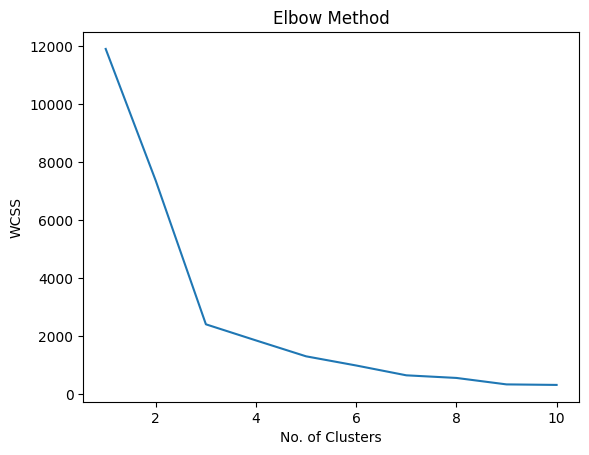

In [10]:
wcss = []

for i in range(1, 11):
  kmeans = KMeans(n_clusters=i, random_state=42)
  kmeans.fit(X_scaled)
  wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss)
plt.xlabel("No. of Clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()

In [11]:
kmeans = KMeans(n_clusters=3, random_state=42)
labels=kmeans.fit_predict(X_scaled)

In [12]:
df['Cluster'] = labels

In [13]:
df.head()

,species,length,weight,w_l_ratio,Cluster
0,Anabas testudineus,10.66,3.45,0.32,2
1,Anabas testudineus,6.91,3.27,0.47,2
2,Anabas testudineus,8.38,3.46,0.41,2
3,Anabas testudineus,7.57,3.36,0.44,2
4,Anabas testudineus,10.83,3.38,0.31,2


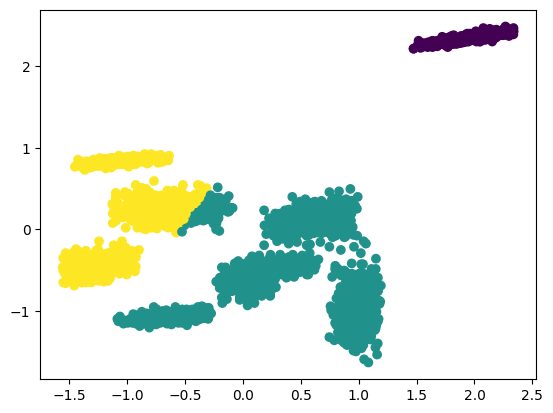

In [14]:
plt.scatter(X_scaled[:,0],X_scaled[:,1],c=labels)
plt.show()

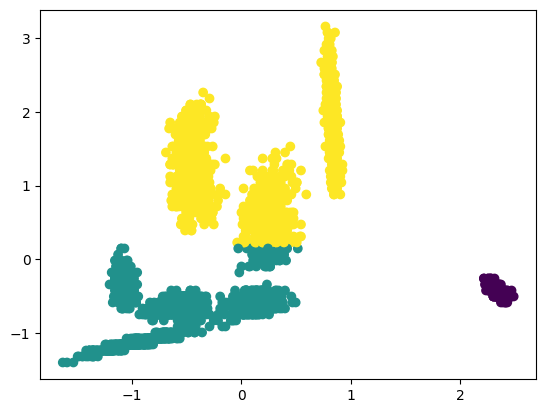

In [15]:
plt.scatter(X_scaled[:,1],X_scaled[:,2],c=labels)
plt.show()